In [17]:
from sklearn import decomposition
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
def bmi_cal(bmi):
    if 18.5 > bmi:
        return ["underfat", "black"]
    if 18.5 <= bmi < 25:
        return ["healthy", "red"]
    if 25 <= bmi < 30:
        return ["overfat", "green"]
    if 30 <= bmi:
        return ["obese", "blue"]

def balance_to_colors(state):
    if state.capitalize() == "Underfat":
        return "black"
    if state.capitalize() == "Healthy":
        return "red"
    if state.capitalize() == "Overfat":
        return "green"
    if state.capitalize() == "Obese":
        return "blue"
    return "yellow"


In [4]:
plt.rcParams["figure.figsize"] = [15,10]

In [5]:
procrustes = np.load("procrustes.npy")
ids = np.load("procrustes_id.npy")

In [6]:
ids

array(['009', '147', '145', '149', '042', '070', '081', '092', '002',
       '071', '084', '086', '135', '117', '024', '103', '141', '130',
       '107', '058', '080', '055', '038', '125', '018', '091', '106',
       '153', '047', '041', '033', '097', '030', '089', '146', '094',
       '006', '142', '139', '035', '051', '087', '121', '028', '064',
       '079', '067', '049', '048', '046', '113', '100', '045', '143',
       '151', '127', '104', '061', '021', '059', '150', '148', '050',
       '138', '098', '090', '115', '054', '011', '073', '085', '053',
       '019', '069', '015', '118', '044', '105', '005', '026', '110',
       '154', '082', '124', '004', '078', '012', '016', '074', '114',
       '025', '001', '036', '052', '075', '034', '039', '112', '123',
       '137', '120', '088', '128', '013', '101', '020', '017', '063',
       '065', '122', '136', '056', '043'], dtype='<U3')

In [7]:
data = pd.read_excel("./planilla_colecta.xlsx")
data = data[data['id'].isin(ids)]
sexo = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["sexo"]])[0], ids))).reshape(113)
sexo["f" == sexo] = "red"
sexo["m" == sexo] = "blue"
sexo["m " == sexo] = "blue"

In [8]:
data.columns

Index(['id', 'fecha de colecta', 'sexo', 'edad', 'peso', 'altura 1',
       'altura 2', 'promedio altura', 'cir cin 1', 'cir cin 2',
       'promedio cir cin', 'cir cad 1', 'cir cad 2', 'promedio cir cad',
       'cir muslo 1', 'cir mus 2', 'promedio cir muslo', 'cir muslo izq 1',
       'cir muslo izq 2', 'promedio cir muslo izq', 'cir pan der 1',
       'cinr pan der  2', 'promedio cir pan der ', 'cir pan izq 1',
       'cinr pan izq 2', 'promedio cir pan izq', 'cir biceps der 1',
       'cir biceps der 2', 'promedio cir biceps der ', 'cir biceps izq 1',
       'cinr biceps izq 2', 'promedio cir biceps izq', 'pliegue subes der',
       'pliegue subes izq', 'pliegue bicipital der ', 'pliegue bicipital izq',
       'lateralidad', 'BMI', 'Body fat%', 'Mass', 'Body fat range',
       'Fat free mass', 'Body water%', 'Mass.1', 'Muscle mass',
       'observaciones', 'Contacto', 'Pass', 'link'],
      dtype='object')

In [9]:
sexo = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["sexo"]])[0], ids))).reshape(113)
peso = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["peso"]])[0], ids))).reshape(113)
altura = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["promedio altura"]])[0] / 100 , ids))).reshape(113)
balance = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["Body fat range"]])[0] , ids)), dtype=np.str).reshape(113)

cad = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["promedio cir cad"]])[0], ids))).reshape(113)
cin = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["promedio cir cin"]])[0], ids))).reshape(113)

ict = cin / altura
icc = cin / cad

In [10]:
procrustes.shape

(113, 339000, 2)

Text(0.5,1,'id=043')

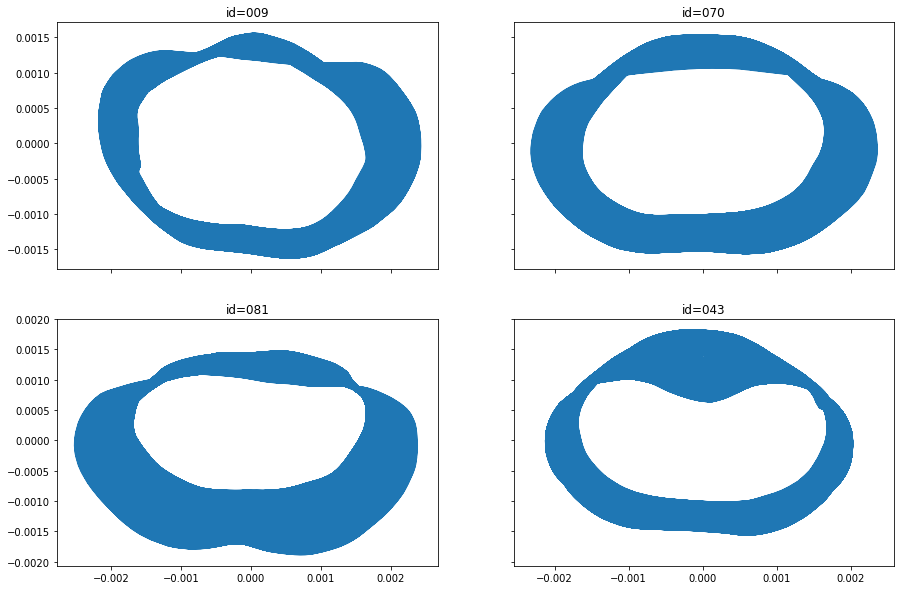

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(procrustes[0][:,0],procrustes[0][:,1],"-")
ax1.set_title("id="+ids[0])
ax2.plot(procrustes[5][:,0],procrustes[5][:,1],"-")
ax2.set_title("id="+ids[5])
ax3.plot(procrustes[6][:,0],procrustes[6][:,1],"-")
ax3.set_title("id="+ids[6])
ax4.plot(procrustes[-1][:,0],procrustes[-1][:,1],"-")
ax4.set_title("id="+ids[-1])

In [12]:
data[["id", "observaciones"]].dropna()

Empty DataFrame
Columns: [id, observaciones]
Index: []

# REDUCCIÓN DE DIMENSIONALIDAD

In [19]:
pcs = 60
pca = decomposition.PCA(n_components=pcs, svd_solver='randomized')
pca.fit(procrustes.reshape(113, -1))
print("Con n_components = {} el valor es: {} ".format(pcs, pca.explained_variance_ratio_.sum()))
x_out = pca.transform(procrustes.reshape(113, -1))

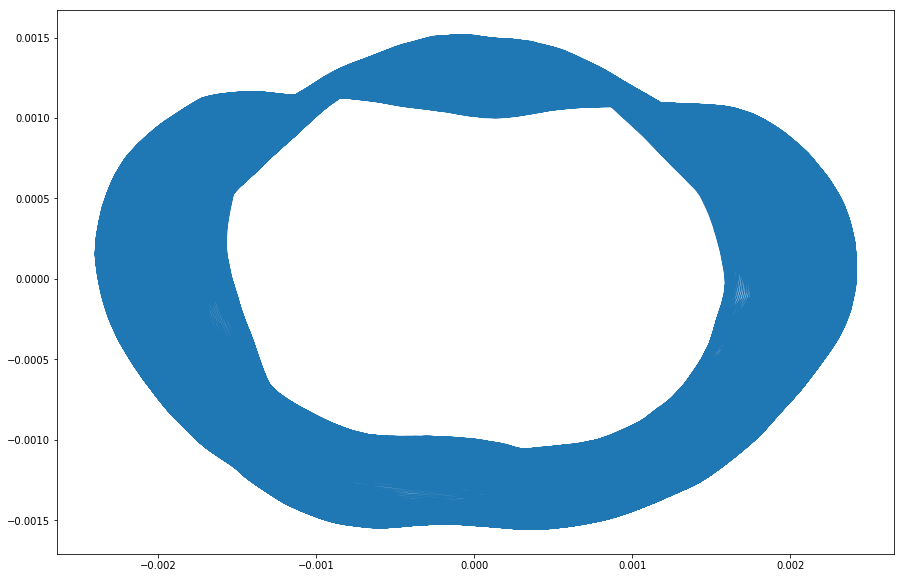

In [22]:
b = procrustes[ids == "149"]
plt.plot(b[0][:, 0], b[0][:, 1])

In [13]:
bmis = np.array(list(map( lambda pa: bmi_cal(pa[0] / (pa[1]*pa[1]))  ,zip(peso,altura))))
balance_c = np.array(list(map( lambda pa: balance_to_colors(pa),balance)))

In [14]:
sexo["f" == sexo] = "red"
sexo["m" == sexo] = "blue"
sexo["m " == sexo] = "blue"

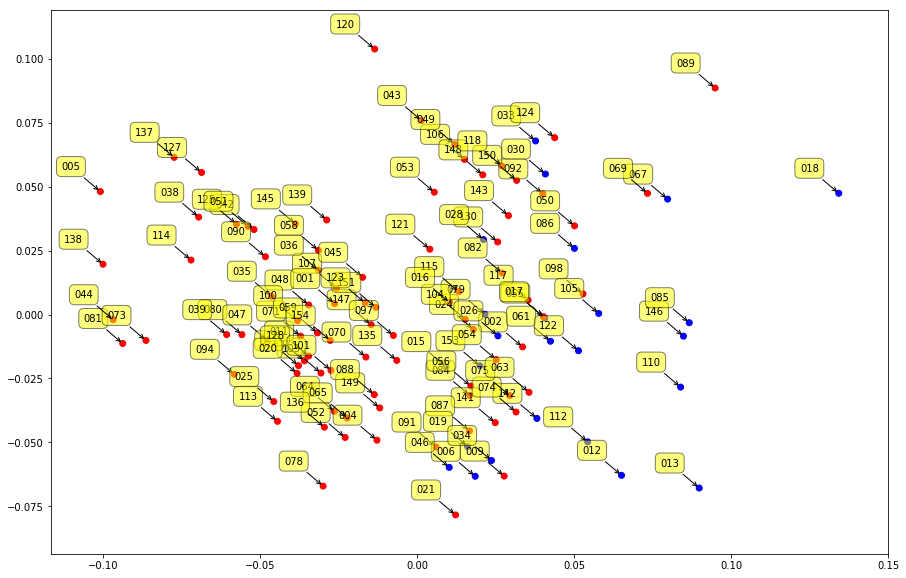

In [25]:
plt.scatter(x_out[:, 0], x_out[:, 1], c=sexo, marker="o")
for label, x, y in zip(ids, x_out[:,0], x_out[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

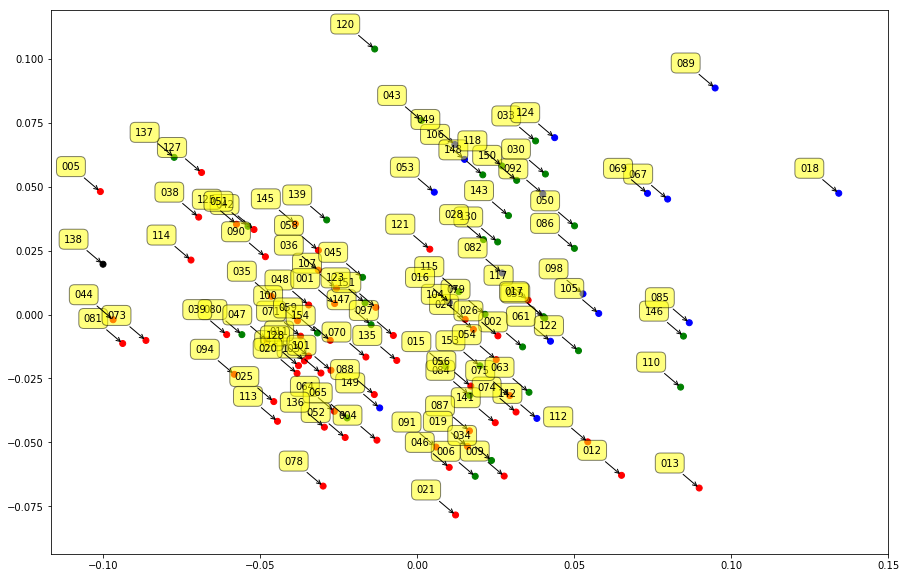

In [26]:
plt.scatter(x_out[:, 0], x_out[:, 1], c=bmis[:,1], marker="o")
for label, x, y in zip(ids, x_out[:,0], x_out[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

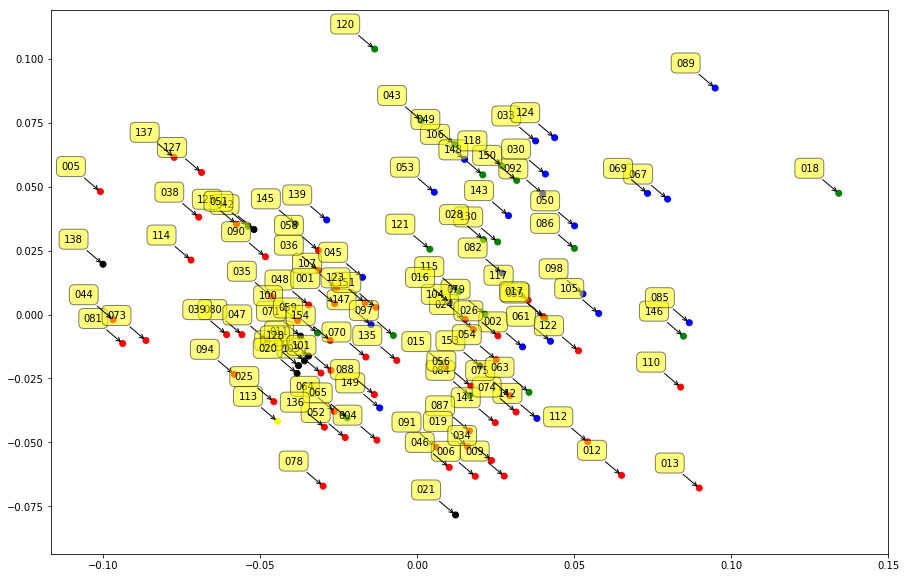

In [27]:
plt.scatter(x_out[:, 0], x_out[:, 1], c=balance_c, marker="o")
for label, x, y in zip(ids, x_out[:,0], x_out[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [28]:
df = pd.DataFrame()

In [30]:
df["id"] = ids
for i in np.arange(pcs):
    df["pc-{}".format(i+1)] = x_out[:, i]
df["altura"] = altura
df["peso"] = peso
df["sexo"] = sexo
bmis = np.array(list(map( lambda pa: pa[0] / (pa[1]*pa[1])  ,zip(peso,altura))))
df["bmi"] = bmis
df["icc"] = icc
df["ict"] = ict

In [34]:
df

id      pc-1      pc-2      pc-3      pc-4      pc-5      pc-6  \
0    009  0.027718 -0.063153  0.028142  0.016898 -0.020209 -0.026986   
1    147 -0.014661 -0.003965 -0.002300  0.013653  0.021307  0.002472   
2    145 -0.038770  0.035456 -0.010694  0.001320 -0.007141 -0.004070   
3    149 -0.011917 -0.036502  0.028034  0.002514  0.010392 -0.028489   
4    042 -0.051932  0.033241  0.011814 -0.034014  0.027131 -0.012945   
5    070 -0.016305 -0.016615  0.002848  0.000984 -0.009845  0.023832   
6    081 -0.093751 -0.011317 -0.010126 -0.023986  0.006188  0.022438   
7    092  0.040014  0.047196  0.001884 -0.016829  0.012529  0.013151   
8    002  0.033577 -0.012649 -0.009528  0.001218 -0.038519  0.003773   
9    071 -0.037117 -0.008445 -0.016513 -0.008344 -0.022185  0.017404   
10   084  0.016719 -0.031572  0.016177 -0.027685 -0.035672  0.014173   
11   086  0.050083  0.025872 -0.049203 -0.004092  0.004984  0.027125   
12   135 -0.006483 -0.017946  0.026421  0.016158  0.018212 -0.003577   
13   117  0.035344  0.005589  0.016564  0.009067  0.006594 -0.017346   
14   024  0.017923 -0.005825  0.006030 -0.015713 -0.007688 -0.013140   
15   103 -0.030619 -0.022871  0.028198  0.023481  0.009518 -0.013830   
16   141  0.024877 -0.042277 -0.011444 -0.001696 -0.008447  0.006552   
17   130  0.025644  0.028376  0.015187  0.017239  0.012266  0.001756   
18   107 -0.025674  0.010294 -0.016607 -0.005368  0.055003 -0.008483   
19   058 -0.031432  0.025091  0.007937  0.004700 -0.009818 -0.011519   
20   080 -0.055793 -0.007854 -0.040485 -0.029302 -0.005874  0.020838   
21   055  0.040637 -0.001363 -0.039251 -0.001217  0.006050  0.034702   
22   038 -0.069551  0.038083 -0.023849 -0.006856  0.013867 -0.011567   
23   125 -0.057516  0.035302 -0.001171 -0.011532 -0.015440 -0.012063   
24   018  0.134251  0.047413  0.013857  0.031033 -0.012198  0.018020   
25   091  0.006014 -0.051797  0.027026 -0.010103  0.014356 -0.018676   
26   106  0.015092  0.060661 -0.018110  0.026351 -0.019283 -0.015874   
27   153  0.019993 -0.020036  0.033582 -0.000734  0.006645 -0.020367   
28   047 -0.047888 -0.009913  0.015134  0.015123  0.006991 -0.013807   
29   041 -0.037766 -0.019972  0.000141  0.007050  0.009683  0.007959   
..   ...       ...       ...       ...       ...       ...       ...   
83   124  0.043792  0.069151  0.036592  0.010668  0.008497 -0.010052   
84   004 -0.012798 -0.049113  0.022232 -0.051152  0.040144  0.002472   
85   078 -0.029935 -0.067063  0.011691  0.007238 -0.010787  0.013819   
86   012  0.065081 -0.062861  0.060285 -0.015385 -0.032546 -0.031331   
87   016  0.010315  0.004745 -0.055243  0.003643 -0.006897 -0.034545   
88   074  0.031497 -0.038115  0.031664 -0.002243  0.024362  0.023612   
89   114 -0.071993  0.021302 -0.003591 -0.016856 -0.003031  0.006541   
90   025 -0.045637 -0.034028 -0.032451 -0.026277 -0.011209 -0.000280   
91   001 -0.026259  0.004284 -0.014951  0.062567 -0.024115 -0.001419   
92   036 -0.031466  0.017362 -0.023532 -0.009198  0.020988 -0.034593   
93   052 -0.022911 -0.048057 -0.022689  0.027237 -0.018087  0.015277   
94   075  0.029468 -0.031672 -0.011373 -0.023100 -0.004974 -0.003543   
95   034  0.023688 -0.057048  0.020140  0.002597  0.015756  0.011605   
96   039 -0.060640 -0.007846  0.020744  0.002027 -0.006334 -0.026272   
97   112  0.054321 -0.049769  0.025201 -0.016687  0.033877 -0.028171   
98   123 -0.016587  0.004571 -0.022253 -0.001761  0.015994 -0.018641   
99   137 -0.077364  0.061454 -0.015597 -0.006983 -0.003172 -0.018906   
100  120 -0.013514  0.103807  0.011271 -0.017513 -0.011349  0.016110   
101  088 -0.013637 -0.031285 -0.011399 -0.011438  0.028909 -0.016468   
102  128 -0.035888 -0.018118  0.028602 -0.017704 -0.018287 -0.007787   
103  013  0.089811 -0.067822  0.014378  0.058239  0.011420 -0.013733   
104  101 -0.027438 -0.021797 -0.005417  0.018989 -0.002377 -0.023434   
105  020 -0.038228 -0.022979 -0.000882  0.013648  0.006951 -0.000207   
106  017  0.040248 -0.000837  0.005687 -0.0166

In [36]:
df.to_csv("data.csv", sep=";")

# Reduccion de dimensionalidad - Solo Mujeres

In [15]:
p_m = procrustes[sexo == "red"]
p_m_id = ids[sexo == "red"]

In [18]:
pcs = 20
pca = decomposition.PCA(n_components=pcs, svd_solver='randomized')
pca.fit(p_m.reshape(88, -1))
print("Con n_components = {} el valor es: {} ".format(pcs, pca.explained_variance_ratio_.sum()))
x_out = pca.transform(p_m.reshape(88, -1))

Con n_components = 20 el valor es: 0.6026781846865018 


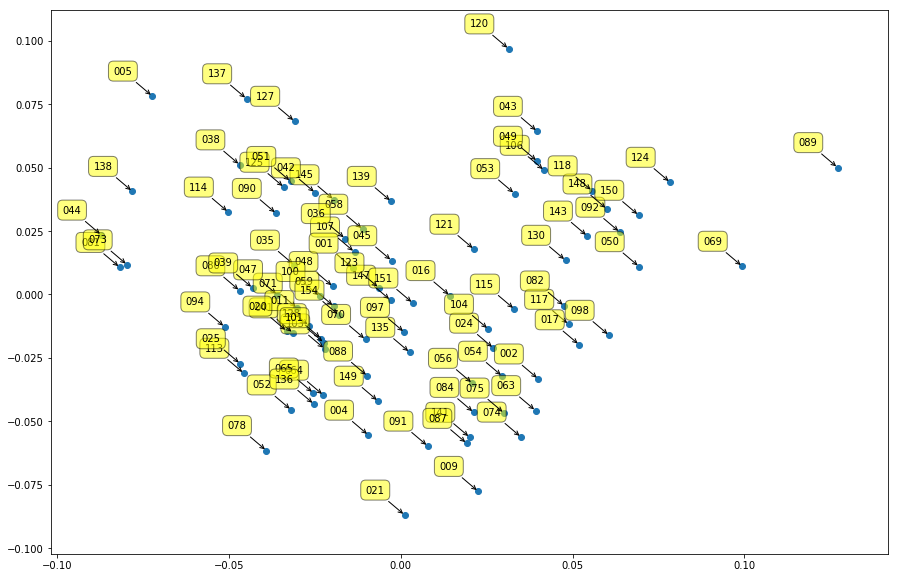

In [20]:
plt.scatter(x_out[:, 0], x_out[:, 1], marker="o")
for label, x, y in zip(p_m_id, x_out[:,0], x_out[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [22]:
df = pd.DataFrame()
df["id"] = p_m_id
for i in np.arange(pcs):
    df["pc-{}".format(i+1)] = x_out[:, i]
df["altura"] = altura[sexo == "red"]
df["peso"] = peso[sexo == "red"]
df["sexo"] = sexo[sexo == "red"]
bmis = np.array(list(map( lambda pa: pa[0] / (pa[1]*pa[1])  ,zip(peso,altura))))
df["bmi"] = bmis[sexo == "red"]
df["icc"] = icc[sexo == "red"]
df["ict"] = ict[sexo == "red"]

In [24]:
df.to_csv("data_f.csv", sep=";")

# Reduccion de dimensionalidad - Solo Hombres

In [25]:
p_h = procrustes[sexo == "blue"]
p_h_id = ids[sexo == "blue"]

In [26]:
p_h.shape

(25, 339000, 2)

In [27]:
pcs = 20
pca = decomposition.PCA(n_components=pcs, svd_solver='randomized')
pca.fit(p_h.reshape(25, -1))
print("Con n_components = {} el valor es: {} ".format(pcs, pca.explained_variance_ratio_.sum()))
x_out = pca.transform(p_h.reshape(25, -1))

Con n_components = 20 el valor es: 0.9344868267110175 


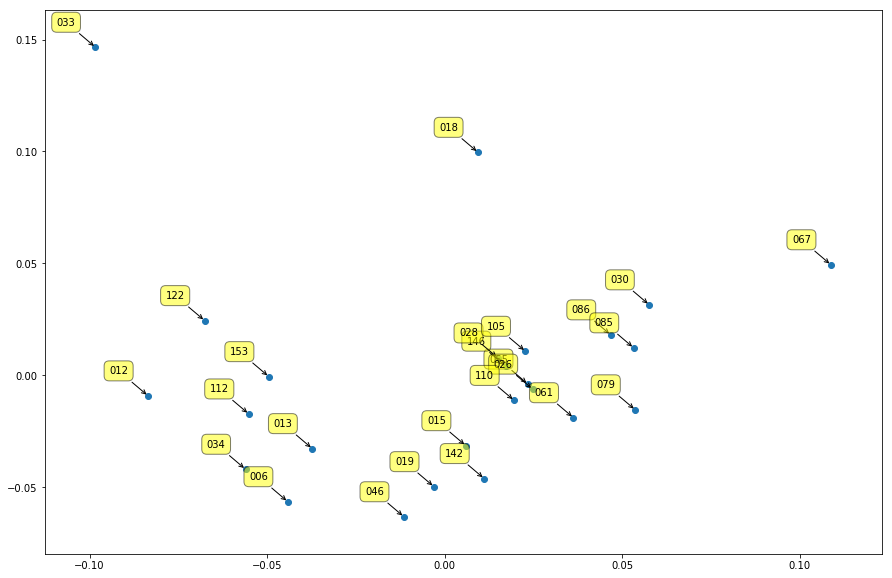

In [28]:
plt.scatter(x_out[:, 0], x_out[:, 1], marker="o")
for label, x, y in zip(p_h_id, x_out[:,0], x_out[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [29]:
df = pd.DataFrame()
df["id"] = p_h_id
for i in np.arange(pcs):
    df["pc-{}".format(i+1)] = x_out[:, i]
df["altura"] = altura[sexo == "blue"]
df["peso"] = peso[sexo == "blue"]
df["sexo"] = sexo[sexo == "blue"]
bmis = np.array(list(map( lambda pa: pa[0] / (pa[1]*pa[1])  ,zip(peso,altura))))
df["bmi"] = bmis[sexo == "blue"]
df["icc"] = icc[sexo == "blue"]
df["ict"] = ict[sexo == "blue"]

In [30]:
df.to_csv("data_m.csv", sep=";")

In [31]:
df

id      pc-1      pc-2      pc-3      pc-4      pc-5      pc-6      pc-7  \
0   086  0.046772  0.018078  0.025572  0.002477 -0.010845  0.005670  0.014041   
1   055  0.023470 -0.003922  0.036397  0.001840 -0.019740  0.003498 -0.026321   
2   018  0.009417  0.099620 -0.037413  0.079801  0.010997  0.009537  0.013708   
3   153 -0.049489 -0.000591 -0.001811 -0.033973 -0.018517 -0.032170  0.036151   
4   033 -0.098319  0.146570  0.053069 -0.029307 -0.000672  0.002167 -0.044593   
5   030  0.057641  0.031487  0.043663  0.023062  0.014715 -0.028725  0.060734   
6   146  0.017240  0.004085 -0.027793  0.035297 -0.047590 -0.014778 -0.005246   
7   006 -0.044142 -0.056471  0.064526  0.074713  0.073929  0.018159 -0.000793   
8   142  0.011150 -0.046133 -0.000942  0.013968 -0.043100 -0.000059 -0.006854   
9   028  0.015017  0.007759  0.052282 -0.000260 -0.058023 -0.011742  0.032571   
10  079  0.053699 -0.015421  0.013576 -0.039388  0.029058  0.021427  0.012892   
11  067  0.108792  0.049390 -0.056879 -0.045948  0.029719  0.006224 -0.007722   
12  046 -0.011459 -0.063190  0.011769 -0.010621 -0.011781  0.039669 -0.017990   
13  061  0.036294 -0.018944  0.010593 -0.019070  0.004857 -0.001719 -0.009415   
14  085  0.053251  0.012276 -0.043447 -0.001774  0.014146  0.038524 -0.009455   
15  019 -0.002994 -0.049745 -0.006972 -0.033598  0.014702 -0.006329 -0.007692   
16  015  0.005990 -0.031436  0.046651 -0.026733 -0.002929 -0.022192 -0.035478   
17  105  0.022776  0.010730 -0.000037  0.003231  0.001685 -0.000141 -0.016682   
18  026  0.024795 -0.006171  0.019104 -0.009493  0.027810 -0.046863 -0.001891   
19  110  0.019588 -0.011218 -0.023850  0.029965 -0.018762 -0.001977 -0.044033   
20  012 -0.083489 -0.009191 -0.063616 -0.037370  0.036416 -0.053486  0.006099   
21  034 -0.056062 -0.041978  0.002633 -0.010053 -0.001551  0.022353  0.018429   
22  112 -0.055131 -0.017265 -0.049620 -0.017249 -0.019254  0.032152  0.028388   
23  013 -0.037251 -0.032757 -0.058500  0.063488 -0.004910 -0.033192 -0.016329   
24  122 -0.067556  0.024438 -0.008953 -0.013005 -0.000358  0.053994  0.027482   

        pc-8      pc-9    ...         pc-17     pc-18     pc-19     pc-20  \
0   0.021946 -0.030629    ...     -0.002980  0.009788 -0.021976  0.006977   
1   0.002999 -0.035207    ...     -0.019882  0.051252  0.016418 -0.001766   
2  -0.036946 -0.024782    ...      0.012804  0.014998  0.008580  0.008589   
3  -0.013097  0.015397    ...      0.026281  0.024695 -0.002555  0.012595   
4   0.005205  0.017631    ...     -0.008810 -0.010065 -0.003172 -0.010338   
5  -0.000652 -0.004541    ...     -0.033372 -0.024542  0.002549  0.014945   
6   0.028801  0.012464    ...      0.007885 -0.001037  0.009328 -0.033079   
7   0.021702  0.031652    ...      0.017003  0.010550 -0.004752 -0.009551   
8  -0.000643  0.023005    ...     -0.000917  0.007256  0.045734  0.001874   
9   0.030238  0.025286    ...      0.005046 -0.007455 -0.020701 -0.002088   
10  0.005082 -0.023129    ...      0.009717 -0.015038  0.027156 -0.015273   
11 -0.010420  0.057892    ...     -0.001427  0.004523 -0.000282 -0.001000   
12 -0.003488  0.018957    ...     -0.016123 -0.019459  0.009499  0.017397   
13 -0.014199 -0.042341    ...      0.029314 -0.026691 -0.005042 -0.021865   
14  0.049375 -0.002823    ...     -0.013632  0.010963 -0.018302 -0.012336   
15 -0.022726  0.001769    ...     -0.027913  0.020307 -0.025385  0.016996   
16 -0.027706 -0.011392    ...     -0.003874 -0.010039 -0.001041 -0.003074   
17  0.004045  0.014831    ...      0.036692 -0.005051  0.008659  0.043701   
18 -0.035348  0.007296    ...      0.001426  0.007705  0.001569 -0.022969   
19  0.004349 -0.022496    ...      0.012725 -0.017545 -0.023366  0.024369   
20  0.056432 -0.024589    ...     -0.000193 -0.001549  0.015026  0.008942   
21 -0.006662 -0.002320    ...      0.007525  0.006316 -0.014386 -0.002112   
22 -0.031921  0.001629    ...      0.010507  0.001719 -0.019246 -0.020843   
23 -0.017566  0.010081    ...     -0.030422 -0.019